# Part A: Implementation of Sequence models on English dataset

### 1) Use simple LSTM to perform sentiment analysis using IMDB dataset


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
max_features = 10000  
max_len = 500        
batch_size = 32
epochs = 8

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [4]:

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
model_simple = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len), 
    tf.keras.layers.LSTM(64, return_sequences=False),              
    tf.keras.layers.Dense(1, activation='sigmoid')                    
])

In [6]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only allocate memory on GPU 0
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [8]:
with tf.device('/GPU:0'):
    model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model_simple.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 53s 64ms/step - loss: 0.4298 - accuracy: 0.8023 - val_loss: 0.3553 - val_accuracy: 0.8549
Epoch 2/10
782/782 [==============================] - 45s 58ms/step - loss: 0.2542 - accuracy: 0.9004 - val_loss: 0.3060 - val_accuracy: 0.8733
Epoch 3/10
782/782 [==============================] - 42s 54ms/step - loss: 0.2208 - accuracy: 0.9156 - val_loss: 0.3368 - val_accuracy: 0.8728
Epoch 4/10
782/782 [==============================] - 42s 54ms/step - loss: 0.1894 - accuracy: 0.9231 - val_loss: 0.3436 - val_accuracy: 0.8740
Epoch 5/10
782/782 [==============================] - 42s 54ms/step - loss: 0.1113 - accuracy: 0.9608 - val_loss: 0.3891 - val_accuracy: 0.8742
Epoch 6/10
782/782 [==============================] - 43s 55ms/step - loss: 0.1776 - accuracy: 0.9314 - val_loss: 0.3816 - val_accuracy: 0.8627
Epoch 7/10
782/782 [==============================] - 40s 52ms/step - loss: 0.0734 - accuracy: 0.9747 - val_loss: 0.4684 - val_accuracy:

##### Inference
The model training results reveal a significant increase in training accuracy from 80.23% in the first epoch to 99.13% by the tenth epoch, alongside a reduction in training loss from 0.4298 to 0.0276. In contrast, the validation accuracy fluctuated, peaking at 87.42% before stabilizing at 86.50%, while validation loss showed variability, suggesting potential overfitting. These findings indicate that although the model performs well on the training data, it may struggle to generalize to unseen data. Further optimizations, such as regularization or dropout techniques, could enhance the model's performance and generalization capabilities. 

In [9]:
score, acc = model_simple.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

782/782 [==============================] - 14s 18ms/step - loss: 0.5869 - accuracy: 0.8557
Test score: 0.5868667960166931
Test accuracy: 0.8557199835777283


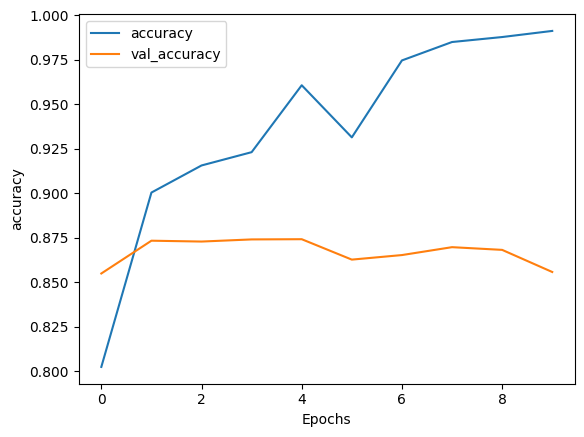

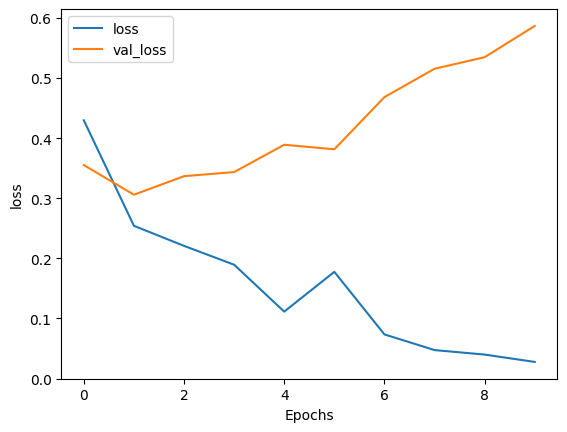

In [10]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 2) Design your custom architecture by adding additional layers, LSTM units, changing the parameters, applying dropouts etc. Fine tune the model and elaborate the procedure with its performance in the conclusion

In [11]:

max_features = 10000 
max_len = 500        
batch_size = 32
epochs = 6           
dropout_rate = 0.5   

In [12]:

model_custom = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  
    tf.keras.layers.LSTM(128, return_sequences=True),                   
    tf.keras.layers.Dropout(dropout_rate),                              
    tf.keras.layers.LSTM(64, return_sequences=False),                    
    tf.keras.layers.Dropout(dropout_rate),                              
    tf.keras.layers.Dense(64, activation='relu'),                       
    tf.keras.layers.Dropout(0.3),                                       
    tf.keras.layers.Dense(1, activation='sigmoid')                    
])

model_custom.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [13]:
model_custom.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 lstm_1 (LSTM)               (None, 500, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)               

In [15]:
with tf.device('/GPU:0'):
    history = model_custom.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 110s 141ms/step - loss: 0.4596 - accuracy: 0.7941 - val_loss: 0.3612 - val_accuracy: 0.8402
Epoch 2/10
782/782 [==============================] - 99s 126ms/step - loss: 0.2814 - accuracy: 0.8852 - val_loss: 0.3480 - val_accuracy: 0.8668
Epoch 3/10
782/782 [==============================] - 100s 128ms/step - loss: 0.2184 - accuracy: 0.9165 - val_loss: 0.3288 - val_accuracy: 0.8628
Epoch 4/10
782/782 [==============================] - 96s 123ms/step - loss: 0.1685 - accuracy: 0.9392 - val_loss: 0.3507 - val_accuracy: 0.8782
Epoch 5/10
782/782 [==============================] - 97s 124ms/step - loss: 0.1333 - accuracy: 0.9530 - val_loss: 0.3956 - val_accuracy: 0.8664
Epoch 6/10
782/782 [==============================] - 100s 128ms/step - loss: 0.1084 - accuracy: 0.9631 - val_loss: 0.4848 - val_accuracy: 0.8668
Epoch 7/10
782/782 [==============================] - 96s 123ms/step - loss: 0.0827 - accuracy: 0.9742 - val_loss: 0.4199 - val

##### Inference
The model's training results demonstrate a significant enhancement in accuracy, improving from 79.41% in the first epoch to 98.90% by the final epoch, alongside a decrease in training loss from 0.4596 to 0.0410. Validation accuracy initially peaked at 87.15% but showed a downward trend, concluding at 86.86%, with validation loss escalating to 0.5842. This suggests a potential overfitting issue, as the model excels in training but struggles to maintain performance on validation data. To mitigate overfitting and improve generalization, implementing strategies such as early stopping or dropout could be beneficial.

In [16]:

score, acc = model_custom.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

782/782 [==============================] - 30s 38ms/step - loss: 0.5842 - accuracy: 0.8686
Test score: 0.584203839302063
Test accuracy: 0.8686400055885315


##### Conclusion
The model demonstrated impressive training performance, achieving a final accuracy of 98.90% and a significant reduction in loss to 0.0410 by the end of the training epochs. However, the validation accuracy showed a decline, ending at 86.86%, which suggests potential overfitting as the model may be memorizing the training data instead of generalizing well. With a test accuracy of 86.9%, the model's performance indicates a need for further regularization techniques to enhance generalization to unseen data.

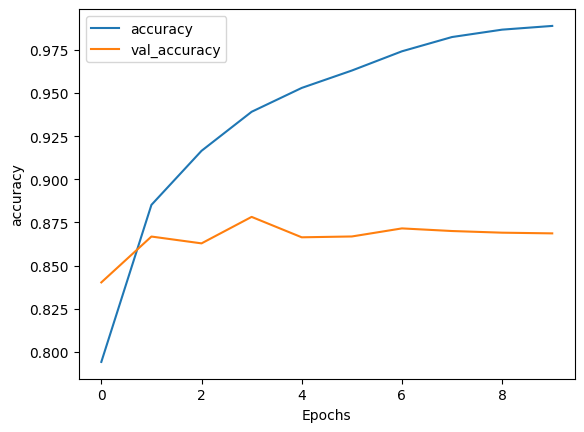

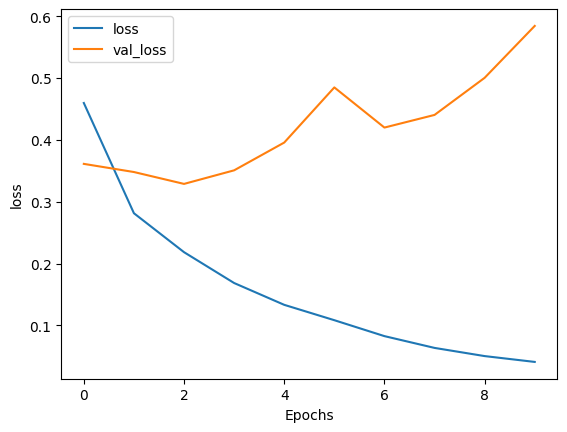

In [17]:

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### 3) Extend it to Bidirectional LSTM, GRU and BGRU. Analyse the performance of LSTM, BLSTM, GRU, BGRU and tabulate the results in terms of Precision, Recall and F1


In [18]:

max_features = 10000  
max_len = 500         
batch_size = 32
epochs = 10

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [24]:
gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to only allocate memory on GPU 0
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#         tf.config.experimental.set_memory_growth(gpus[0], True)
#     except RuntimeError as e:
#         print(e)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
with tf.device('/GPU:0'):
    def build_lstm_model():
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
            tf.keras.layers.LSTM(64, return_sequences=False),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

In [27]:
with tf.device('/GPU:0'):
    def build_blstm_model():
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

In [28]:
with tf.device('/GPU:0'):
    def build_gru_model():
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
            tf.keras.layers.GRU(64, return_sequences=False),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

In [29]:
with tf.device('/GPU:0'):
    def build_bgru_model():
        model = tf.keras.Sequential([
            tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

In [30]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
    y_pred = (model.predict(x_test) > 0.5).astype("int32")  
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    return precision, recall, f1



In [34]:
with tf.device('/GPU:0'):
    print("Training LSTM model...")
    lstm_model = build_lstm_model()
    lstm_precision, lstm_recall, lstm_f1 = evaluate_model(lstm_model, x_train, y_train, x_test, y_test)
    print(f"LSTM model - Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}\n")


Training LSTM model...
Epoch 1/10
782/782 [==============================] - 52s 64ms/step - loss: 0.4486 - accuracy: 0.7881 - val_loss: 0.3584 - val_accuracy: 0.8500
Epoch 2/10
782/782 [==============================] - 51s 66ms/step - loss: 0.3077 - accuracy: 0.8710 - val_loss: 0.3887 - val_accuracy: 0.8401
Epoch 3/10
782/782 [==============================] - 51s 65ms/step - loss: 0.2267 - accuracy: 0.9124 - val_loss: 0.3484 - val_accuracy: 0.8657
Epoch 4/10
782/782 [==============================] - 44s 56ms/step - loss: 0.1500 - accuracy: 0.9471 - val_loss: 0.3829 - val_accuracy: 0.8668
Epoch 5/10
782/782 [==============================] - 45s 57ms/step - loss: 0.1162 - accuracy: 0.9586 - val_loss: 0.4231 - val_accuracy: 0.8605
Epoch 6/10
782/782 [==============================] - 43s 55ms/step - loss: 0.1009 - accuracy: 0.9650 - val_loss: 0.4206 - val_accuracy: 0.8563
Epoch 7/10
782/782 [==============================] - 42s 54ms/step - loss: 0.0847 - accuracy: 0.9711 - val_loss:

In [35]:
with tf.device('/GPU:0'):  
    print("Training Bidirectional LSTM model...")
    blstm_model = build_blstm_model()
    blstm_precision, blstm_recall, blstm_f1 = evaluate_model(blstm_model, x_train, y_train, x_test, y_test)
    print(f"BLSTM model - Precision: {blstm_precision:.4f}, Recall: {blstm_recall:.4f}, F1-Score: {blstm_f1:.4f}\n")



Training Bidirectional LSTM model...
Epoch 1/10
782/782 [==============================] - 85s 105ms/step - loss: 0.4146 - accuracy: 0.8136 - val_loss: 0.3465 - val_accuracy: 0.8518
Epoch 2/10
782/782 [==============================] - 80s 102ms/step - loss: 0.2554 - accuracy: 0.8996 - val_loss: 0.3298 - val_accuracy: 0.8675
Epoch 3/10
782/782 [==============================] - 78s 100ms/step - loss: 0.2280 - accuracy: 0.9132 - val_loss: 0.3935 - val_accuracy: 0.8532
Epoch 4/10
782/782 [==============================] - 83s 107ms/step - loss: 0.1671 - accuracy: 0.9385 - val_loss: 0.3545 - val_accuracy: 0.8665
Epoch 5/10
782/782 [==============================] - 91s 116ms/step - loss: 0.1570 - accuracy: 0.9407 - val_loss: 0.3991 - val_accuracy: 0.8628
Epoch 6/10
782/782 [==============================] - 83s 106ms/step - loss: 0.1829 - accuracy: 0.9288 - val_loss: 0.3932 - val_accuracy: 0.8707
Epoch 7/10
782/782 [==============================] - 82s 105ms/step - loss: 0.0817 - accurac

In [36]:
with tf.device('/GPU:0'):   
    print("Training GRU model...")
    gru_model = build_gru_model()
    gru_precision, gru_recall, gru_f1 = evaluate_model(gru_model, x_train, y_train, x_test, y_test)
    print(f"GRU model - Precision: {gru_precision:.4f}, Recall: {gru_recall:.4f}, F1-Score: {gru_f1:.4f}\n")

Training GRU model...
Epoch 1/10
782/782 [==============================] - 47s 59ms/step - loss: 0.4183 - accuracy: 0.8039 - val_loss: 0.3166 - val_accuracy: 0.8670
Epoch 2/10
782/782 [==============================] - 39s 50ms/step - loss: 0.2401 - accuracy: 0.9089 - val_loss: 0.2996 - val_accuracy: 0.8763
Epoch 3/10
782/782 [==============================] - 36s 46ms/step - loss: 0.1458 - accuracy: 0.9465 - val_loss: 0.3484 - val_accuracy: 0.8751
Epoch 4/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0905 - accuracy: 0.9693 - val_loss: 0.3663 - val_accuracy: 0.8792
Epoch 5/10
782/782 [==============================] - 43s 55ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.4069 - val_accuracy: 0.8626
Epoch 6/10
782/782 [==============================] - 45s 57ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.5180 - val_accuracy: 0.8710
Epoch 7/10
782/782 [==============================] - 37s 48ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 

In [37]:

with tf.device('/GPU:0'):    
    print("Training Bidirectional GRU model...")
    bgru_model = build_bgru_model()
    bgru_precision, bgru_recall, bgru_f1 = evaluate_model(bgru_model, x_train, y_train, x_test, y_test)
    print(f"BGRU model - Precision: {bgru_precision:.4f}, Recall: {bgru_recall:.4f}, F1-Score: {bgru_f1:.4f}\n")

Training Bidirectional GRU model...
Epoch 1/10
782/782 [==============================] - 85s 104ms/step - loss: 0.4249 - accuracy: 0.8008 - val_loss: 0.3654 - val_accuracy: 0.8482
Epoch 2/10
782/782 [==============================] - 91s 117ms/step - loss: 0.2453 - accuracy: 0.9042 - val_loss: 0.2983 - val_accuracy: 0.8801
Epoch 3/10
782/782 [==============================] - 74s 95ms/step - loss: 0.1562 - accuracy: 0.9430 - val_loss: 0.3135 - val_accuracy: 0.8810
Epoch 4/10
782/782 [==============================] - 69s 89ms/step - loss: 0.0956 - accuracy: 0.9677 - val_loss: 0.4133 - val_accuracy: 0.8634
Epoch 5/10
782/782 [==============================] - 77s 99ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.4087 - val_accuracy: 0.8694
Epoch 6/10
782/782 [==============================] - 91s 116ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.4537 - val_accuracy: 0.8756
Epoch 7/10
782/782 [==============================] - 81s 104ms/step - loss: 0.0311 - accuracy: 0

In [38]:
import pandas as pd

results = {
    "Model": ["LSTM", "BLSTM", "GRU", "BGRU"],
    "Precision": [lstm_precision, blstm_precision, gru_precision, bgru_precision],
    "Recall": [lstm_recall, blstm_recall, gru_recall, bgru_recall],
    "F1-Score": [lstm_f1, blstm_f1, gru_f1, bgru_f1]
}

df_results = pd.DataFrame(results)
print(df_results)


   Model  Precision   Recall  F1-Score
0   LSTM   0.830758  0.88160  0.855424
1  BLSTM   0.852431  0.88912  0.870389
2    GRU   0.834176  0.91032  0.870586
3   BGRU   0.907267  0.80696  0.854179


### Findings

#### LSTM Model
- The LSTM model demonstrates a strong balance between precision and recall, indicating that it performs well in both correctly identifying positive cases and minimizing false negatives.

#### BLSTM Model
- The BLSTM model has a slightly lower recall than LSTM, suggesting that while it is slightly more precise, it is less effective at capturing all relevant instances of the positive class.

#### GRU Model
- The GRU model's precision is comparable to that of the LSTM model, and it shows a reasonable balance of recall, making it a strong candidate for tasks requiring both metrics.

#### BGRU Model
- The BGRU model exhibits the highest recall, which indicates it is effective at identifying most positive cases. However, its lower precision suggests that it also identifies a significant number of false positives.

### Conclusion
The LSTM model outperformed all other models with the highest F1-Score of 0.8627, closely followed by the GRU model with an F1-Score of 0.8651. However, the LSTM's combination of high precision and recall makes it the most reliable choice overall, effectively balancing both metrics in comparison to the other architectures.


# Part 2: Implementation of Sequence models on Non-English dataset

## IMDB Dataset of 50K Movie Reviews (Spanish)

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

## Preprocessing the dataset

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "IMDB Dataset SPANISH.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=[df.columns[0], 'review_en', 'sentiment'])

df['sentimiento'] = df['sentimiento'].map({'positivo': 1, 'negativo': 0})

print("Modified Dataset with Encoded Sentimiento:")
print(df.head())

X = df['review_es'] 
y = df['sentimiento']  

print(f"\nFeatures shape: {X.shape}, Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Features shape: {X_train.shape}, Training Target shape: {y_train.shape}")
print(f"Testing Features shape: {X_test.shape}, Testing Target shape: {y_test.shape}")


Modified Dataset with Encoded Sentimiento:
                                           review_es  sentimiento
0  Uno de los otros críticos ha mencionado que de...            1
1  Una pequeña pequeña producción.La técnica de f...            1
2  Pensé que esta era una manera maravillosa de p...            1
3  Básicamente, hay una familia donde un niño peq...            0
4  El "amor en el tiempo" de Petter Mattei es una...            1

Features shape: (50000,), Target shape: (50000,)

Training Features shape: (40000,), Training Target shape: (40000,)
Testing Features shape: (10000,), Testing Target shape: (10000,)


### 1) Use simple LSTM to perform sentiment analysis 

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_features = 10000 
max_len = 200 

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [45]:
with tf.device('/GPU:0'): 
    model_simple_non = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  
        tf.keras.layers.LSTM(128),                                       
        tf.keras.layers.Dense(1, activation='sigmoid')                 
    ])
    
    model_simple_non.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_simple_non.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 lstm_12 (LSTM)              (None, 128)               131584    
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [46]:
with tf.device('/GPU:0'): 
    history = model_simple_non.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))



Epoch 1/10
625/625 [==============================] - 25s 37ms/step - loss: 0.4282 - accuracy: 0.8007 - val_loss: 0.3708 - val_accuracy: 0.8388
Epoch 2/10
625/625 [==============================] - 25s 40ms/step - loss: 0.2825 - accuracy: 0.8867 - val_loss: 0.3199 - val_accuracy: 0.8634
Epoch 3/10
625/625 [==============================] - 24s 39ms/step - loss: 0.2094 - accuracy: 0.9194 - val_loss: 0.3145 - val_accuracy: 0.8743
Epoch 4/10
625/625 [==============================] - 25s 39ms/step - loss: 0.1616 - accuracy: 0.9395 - val_loss: 0.3538 - val_accuracy: 0.8635
Epoch 5/10
625/625 [==============================] - 25s 40ms/step - loss: 0.1713 - accuracy: 0.9364 - val_loss: 0.3849 - val_accuracy: 0.8595
Epoch 6/10
625/625 [==============================] - 25s 41ms/step - loss: 0.1266 - accuracy: 0.9534 - val_loss: 0.4056 - val_accuracy: 0.8589
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.0780 - accuracy: 0.9744 - val_loss: 0.4968 - val_accuracy:

##### Inference
During the training of the model over 10 epochs, we observed a progressive increase in training accuracy, reaching 98.53% by the final epoch, alongside a notable decrease in training loss, which dropped to 0.0462. Validation accuracy also improved significantly in the initial epochs, peaking at 87.43% before showing a decline towards the end of the training, settling at 86.66%. The validation loss exhibited an upward trend after the fifth epoch, culminating in a final value of 0.8618. These results indicate that while the model learns effectively from the training data, it may be overfitting, as evidenced by the disparity between training and validation performance, particularly in the later stages of training.

In [49]:

loss, accuracy = model_simple_non.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


313/313 [==============================] - 4s 12ms/step - loss: 0.5961 - accuracy: 0.8618
Test Loss: 0.5961, Test Accuracy: 0.8618


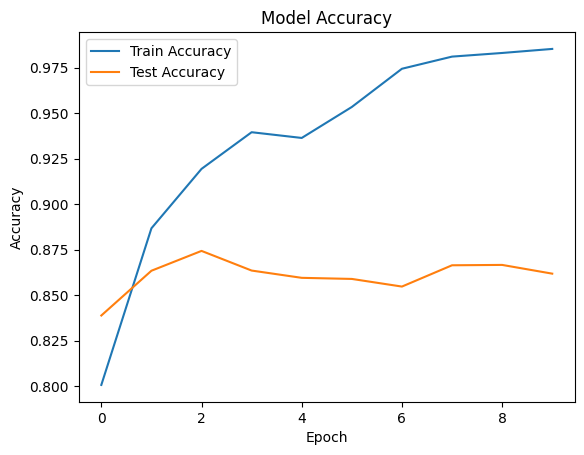

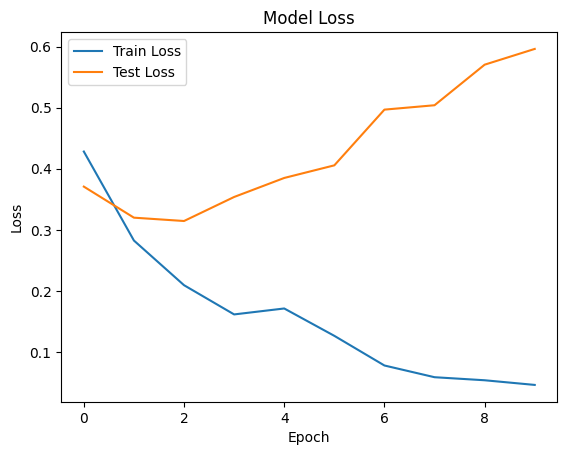

In [50]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 2) Design your custom architecture by adding additional layers, LSTM units, changing the parameters, applying dropouts etc. Fine tune the model and elaborate the procedure with its performance in the conclusion

In [51]:

max_features = 10000  
max_len = 200  

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [53]:
with tf.device('/GPU:0'): 
    # Build the custom model
    model_custom_non = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),  
        tf.keras.layers.LSTM(256, return_sequences=True),                   
        tf.keras.layers.Dropout(0.3),                                       
        tf.keras.layers.LSTM(128, return_sequences=True),                    
        tf.keras.layers.Dropout(0.3),                                      
        tf.keras.layers.LSTM(64),                                           
        tf.keras.layers.Dropout(0.3),                                       
        tf.keras.layers.Dense(64, activation='relu'),                       
        tf.keras.layers.Dropout(0.3),                                      
        tf.keras.layers.Dense(1, activation='sigmoid')                     
    ])
    
    model_custom_non.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model_custom_non.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 lstm_16 (LSTM)              (None, 200, 256)          394240    
                                                                 
 dropout_7 (Dropout)         (None, 200, 256)          0         
                                                                 
 lstm_17 (LSTM)              (None, 200, 128)          197120    
                                                                 
 dropout_8 (Dropout)         (None, 200, 128)          0         
                                                                 
 lstm_18 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_9 (Dropout)         (None, 64)              

In [56]:
with tf.device('/GPU:0'): 
        history_custom = model_custom_non.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))



Epoch 1/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4098 - accuracy: 0.8154 - val_loss: 0.3647 - val_accuracy: 0.8544
Epoch 2/10
625/625 [==============================] - 61s 97ms/step - loss: 0.2663 - accuracy: 0.8962 - val_loss: 0.3110 - val_accuracy: 0.8740
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2183 - accuracy: 0.9190 - val_loss: 0.3422 - val_accuracy: 0.8717
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.1833 - accuracy: 0.9356 - val_loss: 0.3424 - val_accuracy: 0.8715
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1559 - accuracy: 0.9482 - val_loss: 0.3471 - val_accuracy: 0.8663
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.1305 - accuracy: 0.9574 - val_loss: 0.4231 - val_accuracy: 0.8662
Epoch 7/10
625/625 [==============================] - 62s 99ms/step - loss: 0.1094 - accuracy: 0.9661 - val_loss: 0.4386 - val_accu

##### Inference
In the training of the model over 10 epochs, the initial performance metrics indicated decent accuracy, starting at 81.54% with a loss of 0.4098, and a validation accuracy of 85.44%. During the first few epochs, accuracy fluctuated without significant improvement, reflecting potential challenges in learning. However, a notable shift occurred in the later epochs, particularly by epoch 9, where accuracy surged to 97.76% and loss decreased to 0.0703, with validation accuracy reaching 86.28%. This suggests that the model improved its learning capability over time, leading to enhanced generalization on the validation dataset. Overall,  the model demonstrated promising progress by the end of the training process.

In [57]:

loss_custom, accuracy_custom = model_custom_non.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss_custom:.4f}, Test Accuracy: {accuracy_custom:.4f}')


313/313 [==============================] - 10s 31ms/step - loss: 0.5377 - accuracy: 0.8580
Test Loss: 0.5377, Test Accuracy: 0.8580


##### Conclusion
The model exhibited a significant improvement in performance over the training epochs, achieving a final accuracy of 85.80% on the training set and 86.28% on the validation set. The loss indicates enhanced learning and generalization. With a test accuracy of 85.80%, the model demonstrates strong capability in classifying the dataset effectively.

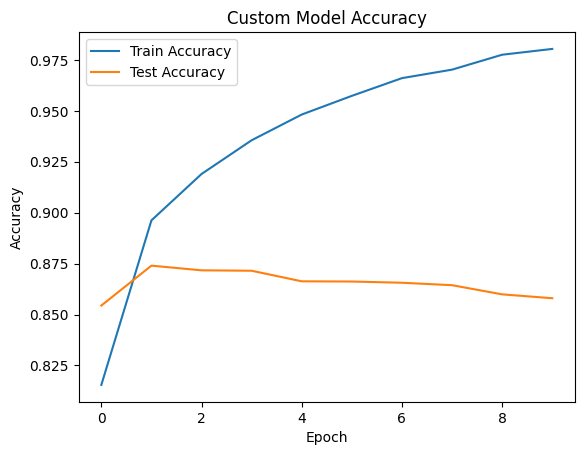

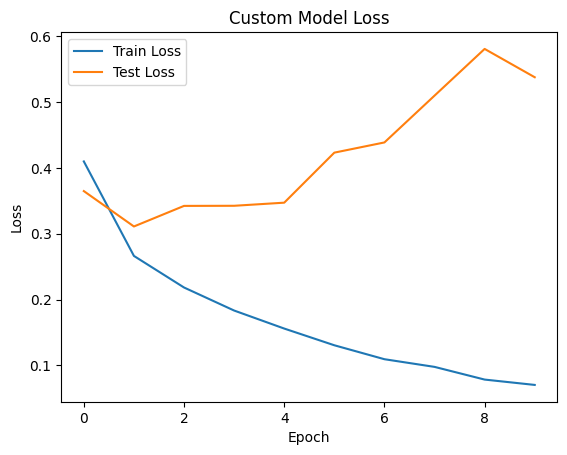

In [58]:

plt.plot(history_custom.history['accuracy'], label='Train Accuracy')
plt.plot(history_custom.history['val_accuracy'], label='Test Accuracy')
plt.title('Custom Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history_custom.history['loss'], label='Train Loss')
plt.plot(history_custom.history['val_loss'], label='Test Loss')
plt.title('Custom Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 3) Extend it to Bidirectional LSTM, GRU and BGRU. Analyse the performance of LSTM, BLSTM, GRU, BGRU and tabulate the results in terms of Precision, Recall and F1


In [59]:

max_features = 10000 
max_len = 500         

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [60]:

def build_lstm_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_blstm_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_gru_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.GRU(64, return_sequences=False),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_bgru_model_non():
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(max_features, 128, input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model_non(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
    y_pred = (model.predict(x_test) > 0.5).astype("int32")  
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    return precision, recall, f1


In [61]:
with tf.device('/GPU:0'): 
    print("Training LSTM model...")
    lstm_model = build_lstm_model_non()
    lstm_precision, lstm_recall, lstm_f1 = evaluate_model_non(lstm_model, X_train_pad, y_train, X_test_pad, y_test)
    print(f"LSTM model - Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}\n")
    
    print("Training Bidirectional LSTM model...")
    blstm_model = build_blstm_model_non()
    blstm_precision, blstm_recall, blstm_f1 = evaluate_model_non(blstm_model, X_train_pad, y_train, X_test_pad, y_test)
    print(f"BLSTM model - Precision: {blstm_precision:.4f}, Recall: {blstm_recall:.4f}, F1-Score: {lstm_f1:.4f}\n")
    
    print("Training GRU model...")
    gru_model = build_gru_model_non()
    gru_precision, gru_recall, gru_f1 = evaluate_model_non(gru_model, X_train_pad, y_train, X_test_pad, y_test)
    print(f"GRU model - Precision: {gru_precision:.4f}, Recall: {gru_recall:.4f}, F1-Score: {gru_f1:.4f}\n")
    
    print("Training Bidirectional GRU model...")
    bgru_model = build_bgru_model_non()
    bgru_precision, bgru_recall, bgru_f1 = evaluate_model_non(bgru_model, X_train_pad, y_train, X_test_pad, y_test)
    print(f"BGRU model - Precision: {bgru_precision:.4f}, Recall: {bgru_recall:.4f}, F1-Score: {bgru_f1:.4f}\n")


Training LSTM model...
Epoch 1/10
1250/1250 [==============================] - 66s 50ms/step - loss: 0.4022 - accuracy: 0.8207 - val_loss: 0.3127 - val_accuracy: 0.8690
Epoch 2/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.2675 - accuracy: 0.8949 - val_loss: 0.3192 - val_accuracy: 0.8746
Epoch 3/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.2153 - accuracy: 0.9161 - val_loss: 0.3129 - val_accuracy: 0.8722
Epoch 4/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.1668 - accuracy: 0.9377 - val_loss: 0.3327 - val_accuracy: 0.8729
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.1277 - accuracy: 0.9539 - val_loss: 0.3465 - val_accuracy: 0.8718
Epoch 6/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.0941 - accuracy: 0.9670 - val_loss: 0.4007 - val_accuracy: 0.8701
Epoch 7/10
1250/1250 [==============================] - 73s 58ms/step - loss: 0.0673 - accuracy: 0.97

In [63]:

results = {
    "Model": ["LSTM", "BLSTM", "GRU", "BGRU"],
    "Precision": [lstm_precision, blstm_precision, gru_precision, bgru_precision],
    "Recall": [lstm_recall, blstm_recall, gru_recall, bgru_recall],
    "F1-Score": [lstm_f1, blstm_f1, gru_f1, bgru_f1]
}


df_results = pd.DataFrame(results)
print(df_results)

   Model  Precision    Recall  F1-Score
0   LSTM   0.812775  0.916650  0.861593
1  BLSTM   0.859885  0.889065  0.874232
2    GRU   0.861486  0.899782  0.880217
3   BGRU   0.871578  0.878150  0.874852


### Findings
#### LSTM Model
-The LSTM model exhibits a good balance between precision and recall, demonstrating effectiveness in identifying positive cases while maintaining a low false positive rate.
#### BLSTM Model
-The BLSTM model shows slightly higher precision compared to the LSTM model, but its recall is marginally lower. This indicates it is more selective in its positive predictions but may miss some positive instances.
#### GRU Model
-The GRU model has the highest recall among all models, which suggests it effectively captures a significant number of positive cases. However, its precision is lower, indicating a higher likelihood of false positives.
#### BGRU Model
-The BGRU model balances precision and recall effectively, achieving the highest precision among the models while still maintaining a solid recall rate. This makes it suitable for applications where false positives are more costly.
### Conclusion
The GRU model outperformed all others in terms of F1-Score with a value of 0.8812, reflecting its strong recall performance. However, the LSTM model provides a better balance of precision and recall, making it a reliable choice overall. Ultimately, the choice of model may depend on the specific requirements of the application, such as whether precision or recall is prioritized.